In [1]:
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline
import seaborn as sns

from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Warnings configuration
# ==============================================================================
import warnings
# warnings.filterwarnings('ignore')

import datetime

C:\ProgramData\miniconda3\envs\dsi-sg\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_west = pd.read_csv('../data/df_west_merge.csv')

In [3]:
df_west

,Unnamed: 0,yr,week,region,no_cases,total_daily_rainfall,max_wind_sp,max_temp,rainy_day,mean_temp,...,mosquito,insect_repellent,dengue_fever_diff,dengue_fever_2nd_diff,dengue_diff,dengue_2nd_diff,mosquito_diff,mosquito_2nd_diff,insect_repellent_diff,insect_repellent_2nd_diff
0,0,2013,21,West,90,153.8,53.3,34.3,1,28.3,...,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2013,22,West,93,91.9,72.7,34.7,1,28.4,...,9.0,3.0,-4.0,0.0,-2.0,0.0,-1.0,0.0,1.0,0.0
2,2,2013,23,West,120,562.1,63.4,35.4,1,28.5,...,18.0,4.0,27.0,31.0,24.0,26.0,9.0,10.0,1.0,0.0
3,3,2013,24,West,239,51.5,67.3,34.7,1,30.0,...,14.0,2.0,-14.0,-41.0,-13.0,-37.0,-4.0,-13.0,-2.0,-3.0
4,4,2013,25,West,286,0.0,56.9,35.0,0,30.1,...,8.0,2.0,-17.0,-3.0,-16.0,-3.0,-6.0,-2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,387,2020,41,West,120,546.0,87.4,33.5,1,27.9,...,10.0,3.0,1.0,3.0,2.0,4.0,0.0,-1.0,0.0,1.0
388,388,2020,42,West,120,93.0,73.5,33.8,1,28.8,...,8.0,3.0,-2.0,-3.0,-1.0,-3.0,-2.0,-2.0,0.0,0.0
389,389,2020,43,West,120,233.2,70.6,34.3,1,28.2,...,10.0,2.0,-1.0,1.0,-2.0,-1.0,2.0,4.0,-1.0,-1.0
390,390,2020,44,West,120,379.7,65.9,34.4,1,28.2,...,6.0,1.0,-1.0,0.0,-1.0,1.0,-4.0,-6.0,-1.0,0.0


In [4]:
df_west.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 392 non-null    int64  
 1   yr                         392 non-null    int64  
 2   week                       392 non-null    int64  
 3   region                     392 non-null    object 
 4   no_cases                   392 non-null    int64  
 5   total_daily_rainfall       392 non-null    float64
 6   max_wind_sp                392 non-null    float64
 7   max_temp                   392 non-null    float64
 8   rainy_day                  392 non-null    int64  
 9   mean_temp                  392 non-null    float64
 10  mean_wind_sp               392 non-null    float64
 11  min_temp                   392 non-null    float64
 12  dengue_fever               392 non-null    float64
 13  dengue                     392 non-null    float64

In [5]:
df_west['index'] = df_west['yr'] * 100 + df_west['week']
df_west.tail()

,Unnamed: 0,yr,week,region,no_cases,total_daily_rainfall,max_wind_sp,max_temp,rainy_day,mean_temp,...,insect_repellent,dengue_fever_diff,dengue_fever_2nd_diff,dengue_diff,dengue_2nd_diff,mosquito_diff,mosquito_2nd_diff,insect_repellent_diff,insect_repellent_2nd_diff,index
387,387,2020,41,West,120,546.0,87.4,33.5,1,27.9,...,3.0,1.0,3.0,2.0,4.0,0.0,-1.0,0.0,1.0,202041
388,388,2020,42,West,120,93.0,73.5,33.8,1,28.8,...,3.0,-2.0,-3.0,-1.0,-3.0,-2.0,-2.0,0.0,0.0,202042
389,389,2020,43,West,120,233.2,70.6,34.3,1,28.2,...,2.0,-1.0,1.0,-2.0,-1.0,2.0,4.0,-1.0,-1.0,202043
390,390,2020,44,West,120,379.7,65.9,34.4,1,28.2,...,1.0,-1.0,0.0,-1.0,1.0,-4.0,-6.0,-1.0,0.0,202044
391,391,2020,45,West,243,329.8,69.1,34.9,1,27.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202045


In [6]:
df_west.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 392 non-null    int64  
 1   yr                         392 non-null    int64  
 2   week                       392 non-null    int64  
 3   region                     392 non-null    object 
 4   no_cases                   392 non-null    int64  
 5   total_daily_rainfall       392 non-null    float64
 6   max_wind_sp                392 non-null    float64
 7   max_temp                   392 non-null    float64
 8   rainy_day                  392 non-null    int64  
 9   mean_temp                  392 non-null    float64
 10  mean_wind_sp               392 non-null    float64
 11  min_temp                   392 non-null    float64
 12  dengue_fever               392 non-null    float64
 13  dengue                     392 non-null    float64

In [7]:
# convert the integer column to a datetime index
df_west['index'] = pd.to_datetime(df_west['index'].astype(str) + '-0', format='%Y%W-%w')

In [8]:
df_west.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0                 392 non-null    int64         
 1   yr                         392 non-null    int64         
 2   week                       392 non-null    int64         
 3   region                     392 non-null    object        
 4   no_cases                   392 non-null    int64         
 5   total_daily_rainfall       392 non-null    float64       
 6   max_wind_sp                392 non-null    float64       
 7   max_temp                   392 non-null    float64       
 8   rainy_day                  392 non-null    int64         
 9   mean_temp                  392 non-null    float64       
 10  mean_wind_sp               392 non-null    float64       
 11  min_temp                   392 non-null    float64       
 12  dengue_f

In [9]:
#df_west = df_west.rename(columns={'index': 'date'})
#df_west = df_west.drop_duplicates(subset='date')
df_west = df_west.set_index('index')
df_west.tail()

,Unnamed: 0,yr,week,region,no_cases,total_daily_rainfall,max_wind_sp,max_temp,rainy_day,mean_temp,...,mosquito,insect_repellent,dengue_fever_diff,dengue_fever_2nd_diff,dengue_diff,dengue_2nd_diff,mosquito_diff,mosquito_2nd_diff,insect_repellent_diff,insect_repellent_2nd_diff
index,,,,,,,,,,,,,,,,,,,,,
2020-10-18,387,2020,41,West,120,546.0,87.4,33.5,1,27.9,...,10.0,3.0,1.0,3.0,2.0,4.0,0.0,-1.0,0.0,1.0
2020-10-25,388,2020,42,West,120,93.0,73.5,33.8,1,28.8,...,8.0,3.0,-2.0,-3.0,-1.0,-3.0,-2.0,-2.0,0.0,0.0
2020-11-01,389,2020,43,West,120,233.2,70.6,34.3,1,28.2,...,10.0,2.0,-1.0,1.0,-2.0,-1.0,2.0,4.0,-1.0,-1.0
2020-11-08,390,2020,44,West,120,379.7,65.9,34.4,1,28.2,...,6.0,1.0,-1.0,0.0,-1.0,1.0,-4.0,-6.0,-1.0,0.0
2020-11-15,391,2020,45,West,243,329.8,69.1,34.9,1,27.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df_west = df_west.loc[~df_west.index.duplicated(), :]

In [11]:
df_west.index.is_unique

True

In [12]:
df_west = df_west.asfreq('W')
print(df_west.index.dtype)
df_west.tail()

datetime64[ns]


,Unnamed: 0,yr,week,region,no_cases,total_daily_rainfall,max_wind_sp,max_temp,rainy_day,mean_temp,...,mosquito,insect_repellent,dengue_fever_diff,dengue_fever_2nd_diff,dengue_diff,dengue_2nd_diff,mosquito_diff,mosquito_2nd_diff,insect_repellent_diff,insect_repellent_2nd_diff
index,,,,,,,,,,,,,,,,,,,,,
2020-10-18,387.0,2020.0,41.0,West,120.0,546.0,87.4,33.5,1.0,27.9,...,10.0,3.0,1.0,3.0,2.0,4.0,0.0,-1.0,0.0,1.0
2020-10-25,388.0,2020.0,42.0,West,120.0,93.0,73.5,33.8,1.0,28.8,...,8.0,3.0,-2.0,-3.0,-1.0,-3.0,-2.0,-2.0,0.0,0.0
2020-11-01,389.0,2020.0,43.0,West,120.0,233.2,70.6,34.3,1.0,28.2,...,10.0,2.0,-1.0,1.0,-2.0,-1.0,2.0,4.0,-1.0,-1.0
2020-11-08,390.0,2020.0,44.0,West,120.0,379.7,65.9,34.4,1.0,28.2,...,6.0,1.0,-1.0,0.0,-1.0,1.0,-4.0,-6.0,-1.0,0.0
2020-11-15,391.0,2020.0,45.0,West,243.0,329.8,69.1,34.9,1.0,27.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
missing_values = df_west.isnull()
rows_with_missing_values = missing_values.any(axis=1)
print(df_west[rows_with_missing_values])

            Unnamed: 0  yr  week region  no_cases  total_daily_rainfall  \
index                                                                     
2019-01-06         NaN NaN   NaN    NaN       NaN                   NaN   

            max_wind_sp  max_temp  rainy_day  mean_temp  ...  mosquito  \
index                                                    ...             
2019-01-06          NaN       NaN        NaN        NaN  ...       NaN   

            insect_repellent  dengue_fever_diff  dengue_fever_2nd_diff  \
index                                                                    
2019-01-06               NaN                NaN                    NaN   

            dengue_diff  dengue_2nd_diff  mosquito_diff  mosquito_2nd_diff  \
index                                                                        
2019-01-06          NaN              NaN            NaN                NaN   

            insect_repellent_diff  insect_repellent_2nd_diff  
index                         

In [14]:
df_west = df_west.fillna(method='ffill')

In [15]:
missing_values = df_west.isnull()
rows_with_missing_values = missing_values.any(axis=1)
print(df_west[rows_with_missing_values])

Empty DataFrame
Columns: [Unnamed: 0, yr, week, region, no_cases, total_daily_rainfall, max_wind_sp, max_temp, rainy_day, mean_temp, mean_wind_sp, min_temp, dengue_fever, dengue, mosquito, insect_repellent, dengue_fever_diff, dengue_fever_2nd_diff, dengue_diff, dengue_2nd_diff, mosquito_diff, mosquito_2nd_diff, insect_repellent_diff, insect_repellent_2nd_diff]
Index: []

[0 rows x 24 columns]


In [16]:
df_west = df_west.sort_index()
df_west.tail()

,Unnamed: 0,yr,week,region,no_cases,total_daily_rainfall,max_wind_sp,max_temp,rainy_day,mean_temp,...,mosquito,insect_repellent,dengue_fever_diff,dengue_fever_2nd_diff,dengue_diff,dengue_2nd_diff,mosquito_diff,mosquito_2nd_diff,insect_repellent_diff,insect_repellent_2nd_diff
index,,,,,,,,,,,,,,,,,,,,,
2020-10-18,387.0,2020.0,41.0,West,120.0,546.0,87.4,33.5,1.0,27.9,...,10.0,3.0,1.0,3.0,2.0,4.0,0.0,-1.0,0.0,1.0
2020-10-25,388.0,2020.0,42.0,West,120.0,93.0,73.5,33.8,1.0,28.8,...,8.0,3.0,-2.0,-3.0,-1.0,-3.0,-2.0,-2.0,0.0,0.0
2020-11-01,389.0,2020.0,43.0,West,120.0,233.2,70.6,34.3,1.0,28.2,...,10.0,2.0,-1.0,1.0,-2.0,-1.0,2.0,4.0,-1.0,-1.0
2020-11-08,390.0,2020.0,44.0,West,120.0,379.7,65.9,34.4,1.0,28.2,...,6.0,1.0,-1.0,0.0,-1.0,1.0,-4.0,-6.0,-1.0,0.0
2020-11-15,391.0,2020.0,45.0,West,243.0,329.8,69.1,34.9,1.0,27.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
print(f'Number of rows with missing values: {df_west.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.0


In [18]:
# Verify that a temporary index is complete
# ==============================================================================
(df_west.index == pd.date_range(start=df_west.index.min(),
                             end=df_west.index.max(),
                             freq=df_west.index.freq)).all()

True

In [19]:
df_west = df_west.drop(['Unnamed: 0','yr','week','region'],axis =1)
df_west

,no_cases,total_daily_rainfall,max_wind_sp,max_temp,rainy_day,mean_temp,mean_wind_sp,min_temp,dengue_fever,dengue,mosquito,insect_repellent,dengue_fever_diff,dengue_fever_2nd_diff,dengue_diff,dengue_2nd_diff,mosquito_diff,mosquito_2nd_diff,insect_repellent_diff,insect_repellent_2nd_diff
index,,,,,,,,,,,,,,,,,,,,
2013-06-02,90.0,153.8,53.3,34.3,1.0,28.3,6.627778,23.1,33.0,30.0,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-06-09,93.0,91.9,72.7,34.7,1.0,28.4,6.977778,22.9,29.0,28.0,9.0,3.0,-4.0,0.0,-2.0,0.0,-1.0,0.0,1.0,0.0
2013-06-16,120.0,562.1,63.4,35.4,1.0,28.5,7.022222,22.4,56.0,52.0,18.0,4.0,27.0,31.0,24.0,26.0,9.0,10.0,1.0,0.0
2013-06-23,239.0,51.5,67.3,34.7,1.0,30.0,9.268254,23.6,42.0,39.0,14.0,2.0,-14.0,-41.0,-13.0,-37.0,-4.0,-13.0,-2.0,-3.0
2013-06-30,286.0,0.0,56.9,35.0,0.0,30.1,8.660317,23.6,25.0,23.0,8.0,2.0,-17.0,-3.0,-16.0,-3.0,-6.0,-2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-18,120.0,546.0,87.4,33.5,1.0,27.9,9.870270,23.2,10.0,10.0,10.0,3.0,1.0,3.0,2.0,4.0,0.0,-1.0,0.0,1.0
2020-10-25,120.0,93.0,73.5,33.8,1.0,28.8,9.831429,22.9,8.0,9.0,8.0,3.0,-2.0,-3.0,-1.0,-3.0,-2.0,-2.0,0.0,0.0
2020-11-01,120.0,233.2,70.6,34.3,1.0,28.2,9.202857,22.7,7.0,7.0,10.0,2.0,-1.0,1.0,-2.0,-1.0,2.0,4.0,-1.0,-1.0


In [20]:
pd.set_option('display.max_rows', None)
df_west

,no_cases,total_daily_rainfall,max_wind_sp,max_temp,rainy_day,mean_temp,mean_wind_sp,min_temp,dengue_fever,dengue,mosquito,insect_repellent,dengue_fever_diff,dengue_fever_2nd_diff,dengue_diff,dengue_2nd_diff,mosquito_diff,mosquito_2nd_diff,insect_repellent_diff,insect_repellent_2nd_diff
index,,,,,,,,,,,,,,,,,,,,
2013-06-02,90.0,153.8,53.3,34.3,1.0,28.3,6.627778,23.1,33.0,30.0,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-06-09,93.0,91.9,72.7,34.7,1.0,28.4,6.977778,22.9,29.0,28.0,9.0,3.0,-4.0,0.0,-2.0,0.0,-1.0,0.0,1.0,0.0
2013-06-16,120.0,562.1,63.4,35.4,1.0,28.5,7.022222,22.4,56.0,52.0,18.0,4.0,27.0,31.0,24.0,26.0,9.0,10.0,1.0,0.0
2013-06-23,239.0,51.5,67.3,34.7,1.0,30.0,9.268254,23.6,42.0,39.0,14.0,2.0,-14.0,-41.0,-13.0,-37.0,-4.0,-13.0,-2.0,-3.0
2013-06-30,286.0,0.0,56.9,35.0,0.0,30.1,8.660317,23.6,25.0,23.0,8.0,2.0,-17.0,-3.0,-16.0,-3.0,-6.0,-2.0,0.0,2.0
2013-07-07,360.0,390.5,72.7,35.6,1.0,28.8,6.792063,20.0,26.0,24.0,9.0,3.0,1.0,18.0,1.0,17.0,1.0,7.0,1.0,1.0
2013-07-14,375.0,160.9,60.1,33.6,1.0,28.3,8.111111,22.9,18.0,17.0,8.0,1.0,-8.0,-9.0,-7.0,-8.0,-1.0,-2.0,-2.0,-3.0
2013-07-21,393.0,390.2,71.3,33.4,1.0,27.8,8.071429,22.5,16.0,16.0,8.0,3.0,-2.0,6.0,-1.0,6.0,0.0,1.0,2.0,4.0
2013-07-28,342.0,71.0,46.8,34.2,1.0,28.0,7.893651,23.2,14.0,13.0,8.0,2.0,-2.0,0.0,-3.0,-2.0,0.0,0.0,-1.0,-3.0


In [21]:
df_west = df_west.loc['2015-01-04':'2018-12-30']

In [22]:
df_west

,no_cases,total_daily_rainfall,max_wind_sp,max_temp,rainy_day,mean_temp,mean_wind_sp,min_temp,dengue_fever,dengue,mosquito,insect_repellent,dengue_fever_diff,dengue_fever_2nd_diff,dengue_diff,dengue_2nd_diff,mosquito_diff,mosquito_2nd_diff,insect_repellent_diff,insect_repellent_2nd_diff
index,,,,,,,,,,,,,,,,,,,,
2015-01-04,11.0,755.3,49.0,32.9,1.0,26.3,7.706122,22.5,7.0,5.0,5.0,1.0,3.0,4.0,1.0,2.0,1.0,3.0,-1.0,-2.0
2015-01-11,5.0,3.8,45.4,33.0,1.0,27.0,10.971429,22.8,5.0,5.0,5.0,2.0,-2.0,-5.0,0.0,-1.0,0.0,-1.0,1.0,2.0
2015-01-18,30.0,358.7,45.0,34.2,1.0,26.6,8.918367,22.4,7.0,7.0,5.0,1.0,2.0,4.0,2.0,2.0,0.0,0.0,-1.0,-2.0
2015-01-25,23.0,1.0,46.8,33.2,1.0,27.5,12.785714,22.0,5.0,5.0,5.0,2.0,-2.0,-4.0,-2.0,-4.0,0.0,0.0,1.0,2.0
2015-02-01,29.0,216.6,47.5,32.9,1.0,26.9,12.653061,21.9,7.0,7.0,7.0,2.0,2.0,4.0,2.0,4.0,2.0,2.0,0.0,-1.0
2015-02-08,15.0,9.9,54.0,33.4,1.0,27.2,10.849091,21.9,6.0,5.0,6.0,1.0,-1.0,-3.0,-2.0,-4.0,-1.0,-3.0,-1.0,-1.0
2015-02-15,30.0,184.3,64.4,32.9,1.0,26.2,10.809524,22.2,4.0,4.0,5.0,1.0,-2.0,-1.0,-1.0,1.0,-1.0,0.0,0.0,1.0
2015-02-22,26.0,0.2,52.9,34.4,1.0,27.0,12.189744,21.9,6.0,4.0,3.0,0.0,2.0,4.0,0.0,1.0,-2.0,-1.0,-1.0,-1.0
2015-03-01,23.0,339.3,57.2,34.6,1.0,27.4,11.028571,22.2,6.0,6.0,5.0,1.0,0.0,-2.0,2.0,2.0,2.0,4.0,1.0,2.0


Train dates : 2015-01-04 00:00:00 --- 2017-12-31 00:00:00  (n=157)
Test dates  : 2018-01-07 00:00:00 --- 2018-12-30 00:00:00  (n=52)


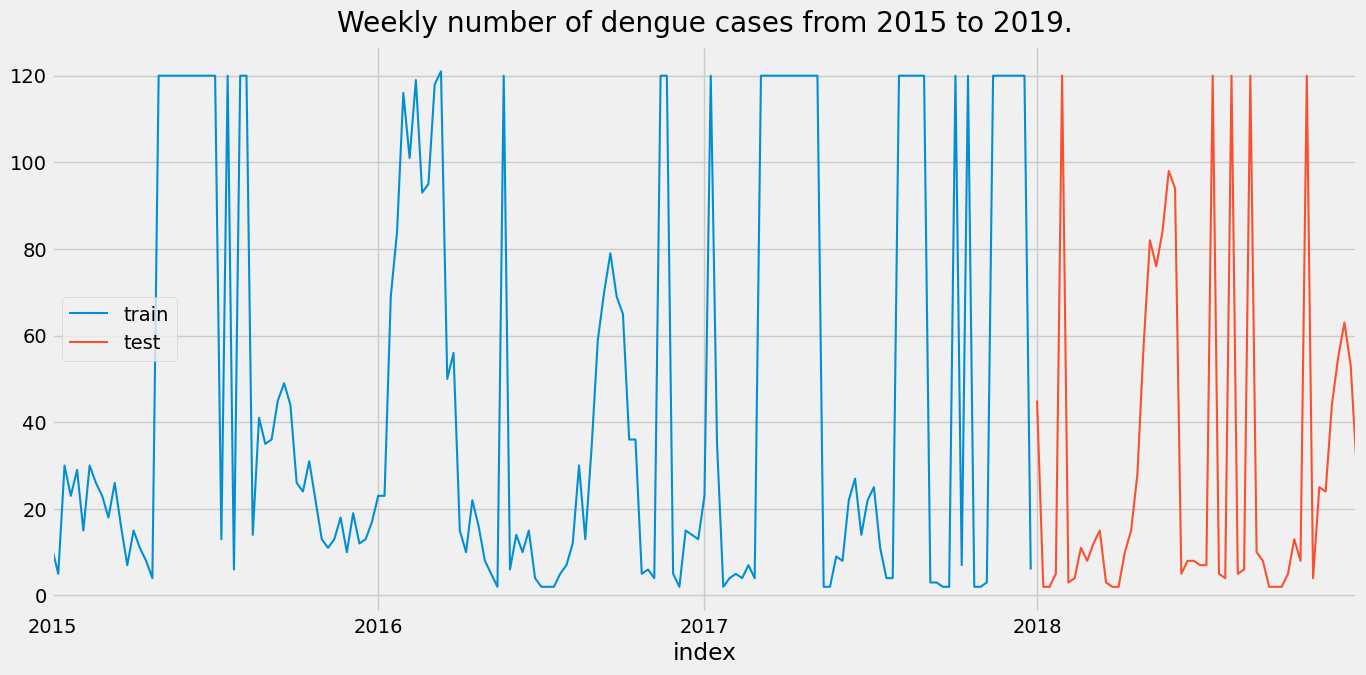

In [23]:
# Split data into train-test
# ==============================================================================
steps = 52
df_west_train = df_west[:-steps]
df_west_test  = df_west[-steps:]

print(f"Train dates : {df_west_train.index.min()} --- {df_west_train.index.max()}  (n={len(df_west_train)})")
print(f"Test dates  : {df_west_test.index.min()} --- {df_west_test.index.max()}  (n={len(df_west_test)})")

fig, ax = plt.subplots(figsize=(15, 7))
df_west_train['no_cases'].plot(ax=ax, label='train',title='Weekly number of dengue cases from 2015 to 2019.')
df_west_test['no_cases'].plot(ax=ax, label='test')
ax.legend();



In [24]:
# Prepare data
df_west['year'] = [d.year for d in df_west.index]
df_west['month'] = [d.strftime('%b') for d in df_west.index]
years = df_west['year'].unique()

C:\Users\ngzen\AppData\Local\Temp\ipykernel_13168\1691541848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_west['year'] = [d.year for d in df_west.index]
C:\Users\ngzen\AppData\Local\Temp\ipykernel_13168\1691541848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_west['month'] = [d.strftime('%b') for d in df_west.index]


In [25]:
df_west['month'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 209 entries, 2015-01-04 to 2018-12-30
Freq: W-SUN
Series name: month
Non-Null Count  Dtype 
--------------  ----- 
209 non-null    object
dtypes: object(1)
memory usage: 3.3+ KB


#### Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution

C:\Users\ngzen\AppData\Local\Temp\ipykernel_13168\4028729242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_west['year'] = [d.year for d in df_west.index]
C:\Users\ngzen\AppData\Local\Temp\ipykernel_13168\4028729242.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_west['month'] = [d.strftime('%b') for d in df_west.index]


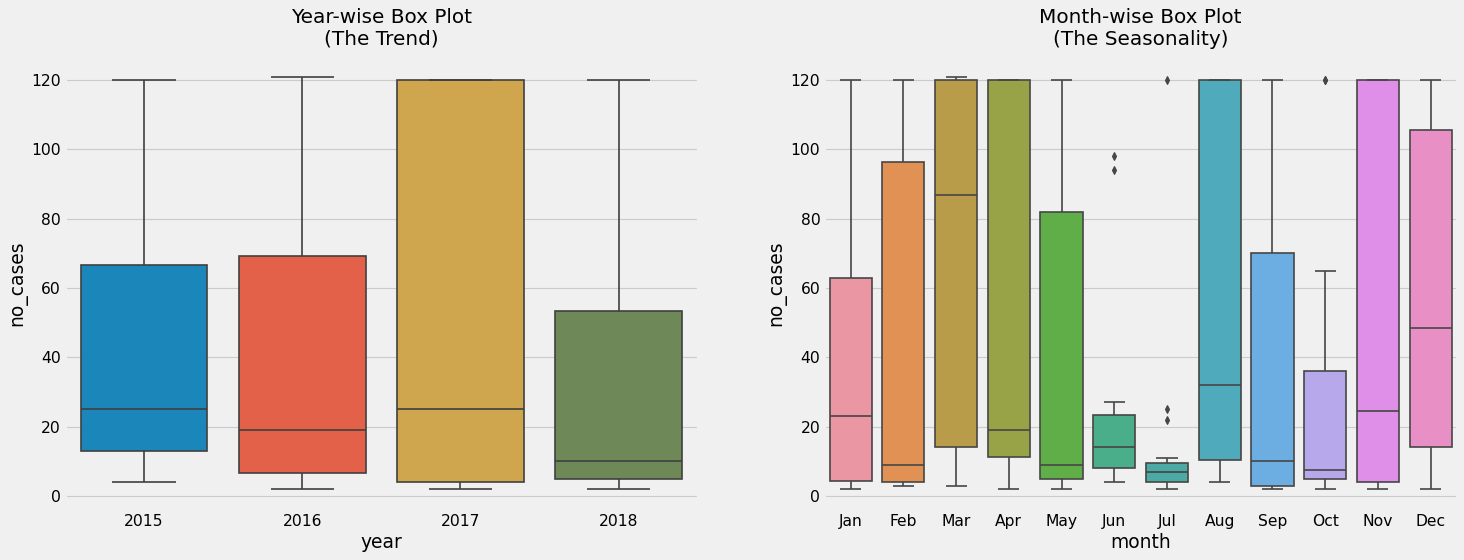

In [26]:
# Prepare data
df_west['year'] = [d.year for d in df_west.index]
df_west['month'] = [d.strftime('%b') for d in df_west.index]
years = df_west['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='no_cases', data=df_west, ax=axes[0])
sns.boxplot(x='month', y='no_cases', data=df_west.loc[~df_west.year.isin([2015, 2019]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

#### stationarity of a series

In [27]:
# ADF Test
result = adfuller(df_west.no_cases.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
    
    


ADF Statistic: -5.917204649161697
p-value: 2.556130880273984e-07
Critial Values:
   1%, -3.4623415245233145
Critial Values:
   5%, -2.875606128263243
Critial Values:
   10%, -2.574267439846904


The ADF test has a p-value of 2.556130880273984e-07, which is much smaller than the significance level of 0.05. This indicates that we can reject the null hypothesis of non-stationarity, and conclude that the time series is stationary. The ADF statistic of -5.917204649161697 is also less than the critical values at the 1%, 5%, and 10% levels of significance, further supporting the conclusion of stationarity.

#### autocorrelation and partial autocorrelation

C:\ProgramData\miniconda3\envs\dsi-sg\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


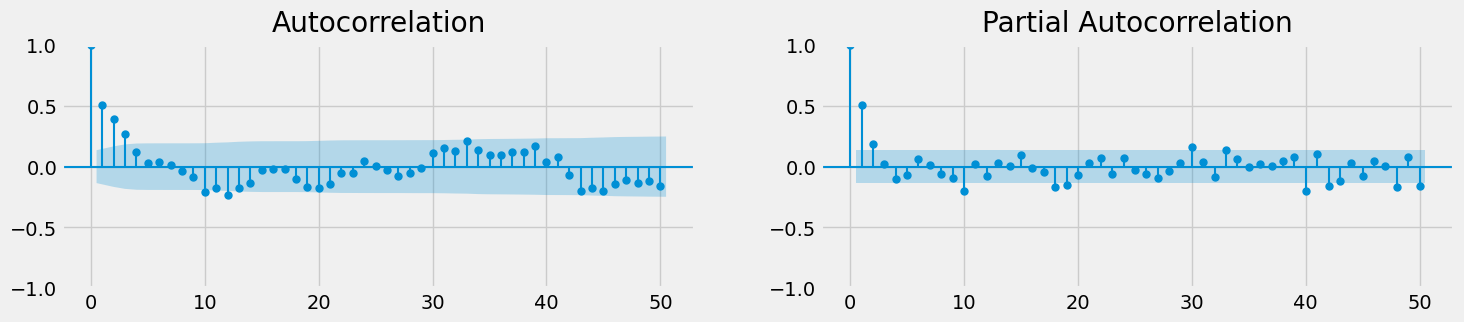

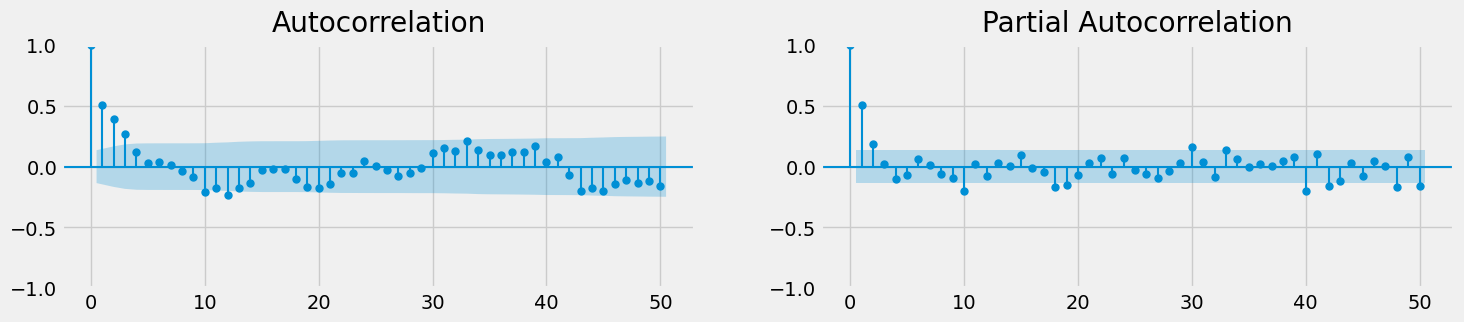

In [28]:
# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df_west.no_cases.tolist(), lags=50, ax=axes[0])
plot_pacf(df_west.no_cases.tolist(), lags=50, ax=axes[1])

#### Lag Plots

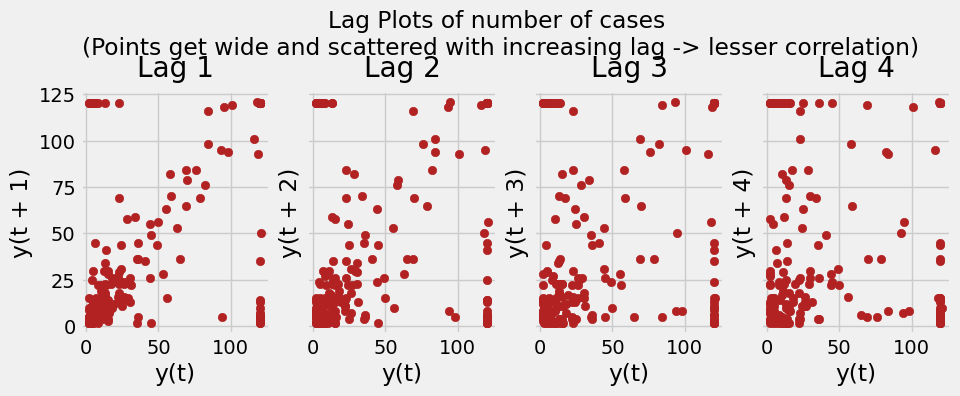

In [29]:
# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df_west.no_cases, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of number of cases \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)     
plt.show()

ForecasterAutoreg   

With the ForecasterAutoreg class, a model is created and trained from a RandomForestRegressor regressor with a time window of 12 lags.

In [30]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12
             )

forecaster.fit(y=df_west_train['no_cases'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
Transformer for y: None 
Transformer for exog: None 
Window size: 12 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2015-01-04 00:00:00'), Timestamp('2017-12-31 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: W-SUN 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2023-04-25 07:47:16 
Last fit date: 2023-04-25 07:47:16 
Skforecast version: 0.7.0 
Python version: 3.11.0 
Forecaster

In [34]:
# Predictions
# ==============================================================================
steps = 52
predictions = forecaster.predict(steps=steps)
predictions.head(5)

2018-01-07    41.94
2018-01-14    70.24
2018-01-21    72.77
2018-01-28    45.19
2018-02-04    65.97
Freq: W-SUN, Name: pred, dtype: float64

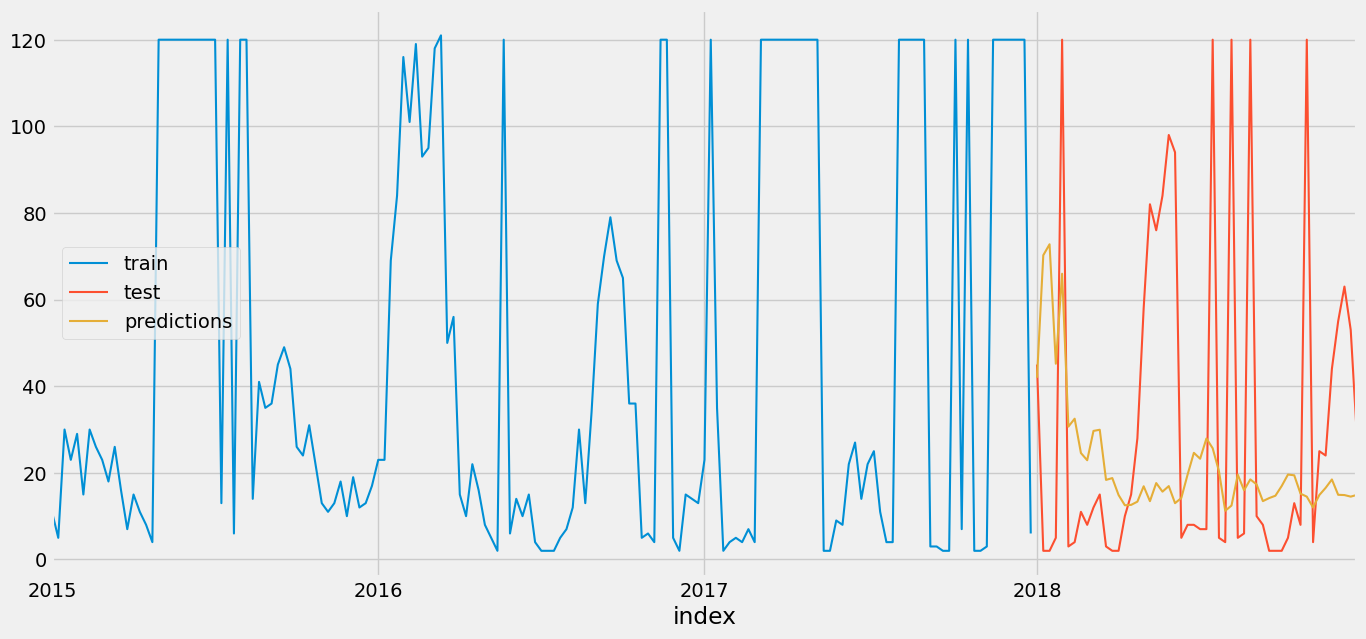

In [35]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(15, 7))
df_west_train['no_cases'].plot(ax=ax, label='train')
df_west_test['no_cases'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();
ax.set_xlim(df_west.index.min(), df_west.index.max());

The error that the model makes in its predictions is quantified. In this case, the metric used is the mean squared error (mse).

In [36]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = df_west_test['no_cases'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 1851.9558442307693


There could be several reasons why the MSE value is high:

Overfitting: If the model is overfitting to the training data, it will not generalize well to the test data. This can result in high MSE values on the test data. To avoid overfitting, you can try regularization techniques or use a simpler model.

Underfitting: If the model is too simple and not able to capture the underlying patterns in the data, it will perform poorly on both the training and test data. This can result in high MSE values on the test data. To avoid underfitting, you can try using a more complex model or adding more features to the model.

Data quality: If the test data is of poor quality, the model will not be able to make accurate predictions. This can result in high MSE values on the test data. To avoid this, you can try cleaning the test data or collecting more high-quality data.

Data distribution: If the test data is significantly different from the training data in terms of its distribution, the model may not be able to make accurate predictions. This can result in high MSE values on the test data. To avoid this, you can try collecting more diverse training data or using data augmentation techniques.

I

Hyperparameter tuning
he trained ForecasterAutoreg uses a 12 lag time window and a Random Forest model with the default hyperparameters. However, there is no reason why these values are the most suitable. In order to identify the best combination of lags and hyperparameters, the Skforecast library provides the grid_search_forecaster function. It compares the results obtained with each model configuration.

In [40]:
# Hyperparameter Grid search
# ==============================================================================
steps = 52
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12 # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = [1,2,3,4,5,6,8,9,10,11,12]

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = df_west_train['no_cases'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(df_west_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 66.


loop lags_grid: 100%|█████████████████████████████████████| 11/11 [03:44<00:00, 20.40s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
  Parameters: {'max_depth': 5, 'n_estimators': 500}
  Backtesting metric: 3749.6336444075578



In [39]:
# Grid Search results
# ==============================================================================
results_grid

,lags,params,mean_squared_error,max_depth,n_estimators
34,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 100}",2721.932861,10,100
32,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 100}",2867.852547,5,100
33,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 500}",3102.589728,5,500
31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 500}",3155.046352,3,500
30,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 100}",3185.724497,3,100
35,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 500}",3211.518097,10,500
29,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 500}",3278.171316,10,500
24,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 100}",3373.993960,3,100
25,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 500}",3610.189622,3,500
27,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 500}",3708.094327,5,500


The best results are obtained using a time window of 1 lags and a Random Forest set up of {'max_depth': 3, 'n_estimators': 100}.

In [45]:
# Hyperparameter Grid search
# ==============================================================================
steps = 52
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12 # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = [1,2,4,6,8,10,12]

# Regressor's hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = df_west_train['no_cases'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(df_west_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

scoring = {
    'mse': 'neg_mean_squared_error',
    'mae': 'neg_mean_absolute_error',
    'rmsle': make_scorer(mean_squared_log_error, greater_is_better=False)
}

Number of models compared: 2268.


loop lags_grid: 100%|██████████████████████████████████████| 7/7 [48:46<00:00, 418.01s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1] 
  Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
  Backtesting metric: 2993.0013704376033



NameError: name 'make_scorer' is not defined

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1] 
  Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
  Backtesting metric: 2993.0013704376033

In [46]:
# Grid Search results
# ==============================================================================
results_grid

,lags,params,mean_squared_error,bootstrap,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators
131,[1],"{'bootstrap': True, 'max_depth': 10, 'max_feat...",2993.001370,True,10,sqrt,4,5,200
158,[1],"{'bootstrap': True, 'max_depth': 10, 'max_feat...",2993.001370,True,10,log2,4,5,200
155,[1],"{'bootstrap': True, 'max_depth': 10, 'max_feat...",2993.001370,True,10,log2,4,2,200
128,[1],"{'bootstrap': True, 'max_depth': 10, 'max_feat...",2993.001370,True,10,sqrt,4,2,200
161,[1],"{'bootstrap': True, 'max_depth': 10, 'max_feat...",2994.124898,True,10,log2,4,10,200
134,[1],"{'bootstrap': True, 'max_depth': 10, 'max_feat...",2994.124898,True,10,sqrt,4,10,200
80,[1],"{'bootstrap': True, 'max_depth': 5, 'max_featu...",3004.646117,True,5,sqrt,4,10,200
107,[1],"{'bootstrap': True, 'max_depth': 5, 'max_featu...",3004.646117,True,5,log2,4,10,200
79,[1],"{'bootstrap': True, 'max_depth': 5, 'max_featu...",3009.322198,True,5,sqrt,4,10,100
106,[1],"{'bootstrap': True, 'max_depth': 5, 'max_featu...",3009.322198,True,5,log2,4,10,100


In [47]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=200,  min_samples_leaf= 4, min_samples_split=5, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 1
             )

forecaster.fit(y=df_west_train['no_cases'])

In [48]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=steps)

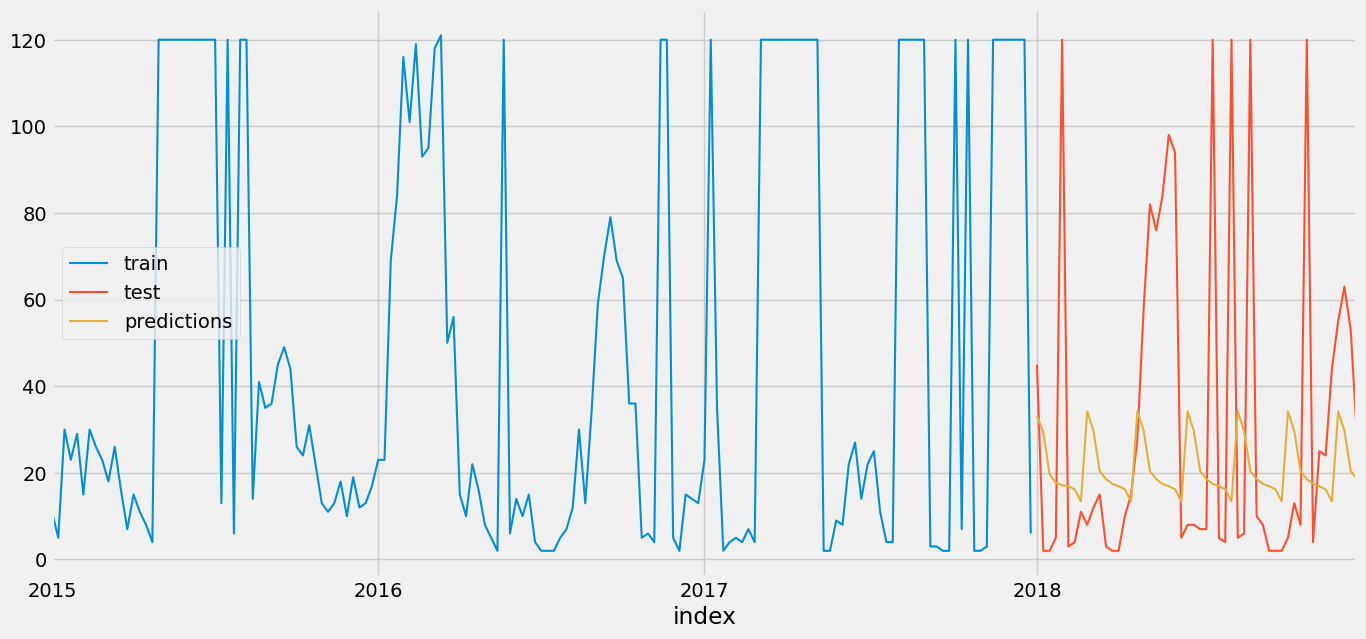

In [49]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(15, 7))
df_west_train['no_cases'].plot(ax=ax, label='train')
df_west_test['no_cases'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [50]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = df_west_test['no_cases'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 1737.0027533711655
